In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy.signal import periodogram

In [2]:
dfcol =["Year","Day","Hour","DSCOVR Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"]
df=pd.read_csv('DATASETS\ACE_WIND_DSCOVR_DATA_BZ.txt',sep=',',header=None,names=dfcol)
df

,Year,Day,Hour,"DSCOVR Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
0,2017,60,0,-2.4,0.3,-0.1
1,2017,60,1,-3.2,0.5,-2.2
2,2017,60,2,-2.4,-0.1,1.1
3,2017,60,3,-2.9,1.8,-1.2
4,2017,60,4,0.9,-0.6,-4.8
...,...,...,...,...,...,...
715,2017,89,19,0.1,0.1,0.3
716,2017,89,20,-1.4,-1.1,-2.8
717,2017,89,21,-1.5,-1.6,-1.1
718,2017,89,22,-2.4,-2.4,-1.6


In [3]:
df = df[~df.isin([999.9]).any(axis=1)]
df.shape

(659, 6)

In [4]:
df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
df

C:\Users\tanis\AppData\Local\Temp\ipykernel_21240\3209360267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")


,Year,Day,Hour,"DSCOVR Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT",datetime_column
0,2017,60,0,-2.4,0.3,-0.1,2017-03-01 00:00:00
1,2017,60,1,-3.2,0.5,-2.2,2017-03-01 01:00:00
2,2017,60,2,-2.4,-0.1,1.1,2017-03-01 02:00:00
3,2017,60,3,-2.9,1.8,-1.2,2017-03-01 03:00:00
4,2017,60,4,0.9,-0.6,-4.8,2017-03-01 04:00:00
...,...,...,...,...,...,...,...
715,2017,89,19,0.1,0.1,0.3,2017-03-30 19:00:00
716,2017,89,20,-1.4,-1.1,-2.8,2017-03-30 20:00:00
717,2017,89,21,-1.5,-1.6,-1.1,2017-03-30 21:00:00
718,2017,89,22,-2.4,-2.4,-1.6,2017-03-30 22:00:00


In [5]:
impcol=["DSCOVR Bz_gse, nT","WIND Bz_gse, nT","ACE Bz_gse, nT"]

In [6]:
df.dtypes

Year                          int64
Day                           int64
Hour                          int64
DSCOVR Bz_gse, nT           float64
WIND Bz_gse, nT             float64
ACE Bz_gse, nT              float64
datetime_column      datetime64[ns]
dtype: object

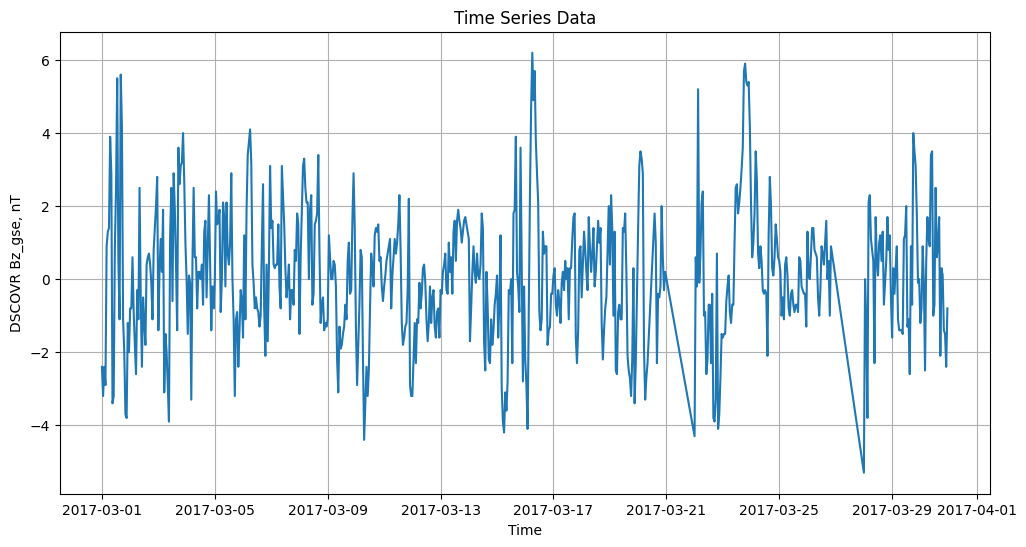

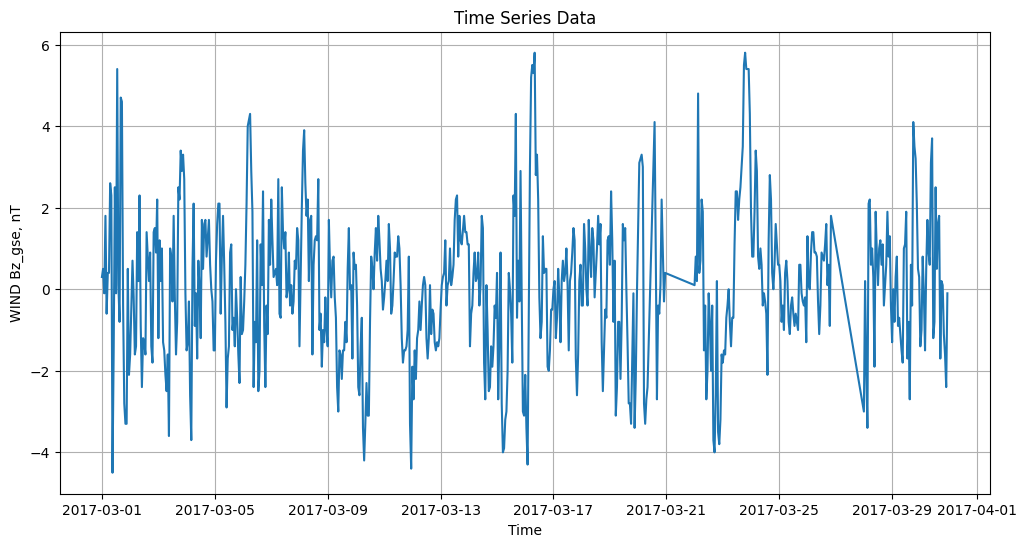

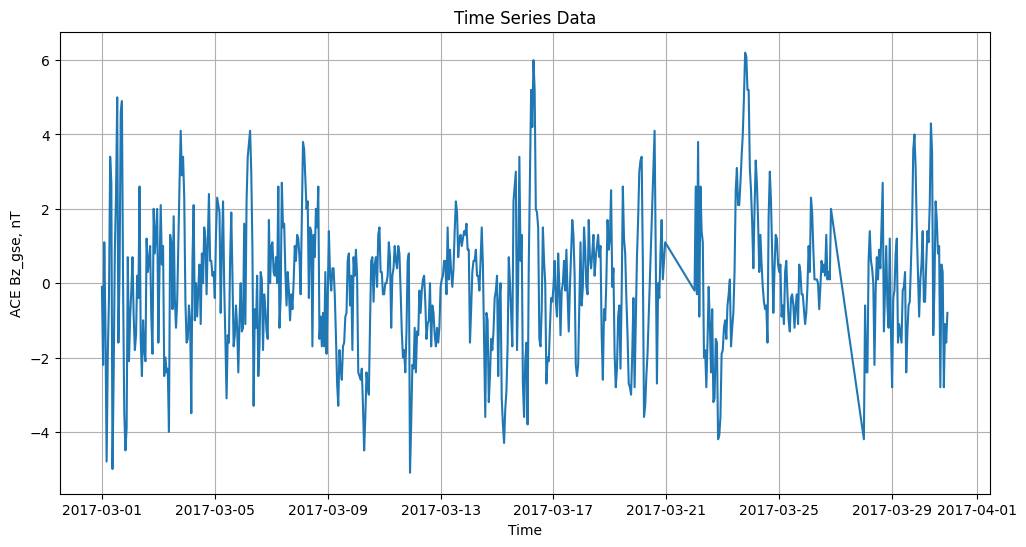

In [7]:
for i in impcol:
    plt.figure(figsize=(12, 6))
    plt.plot(df['datetime_column'], df[i])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.grid(True)
    plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_21240\2409200826.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / xf, amplitude)


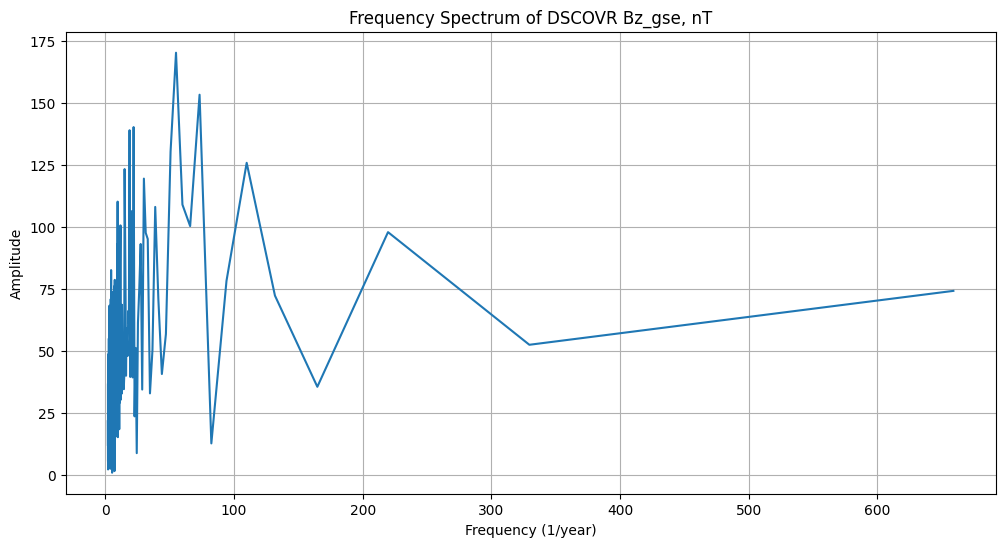

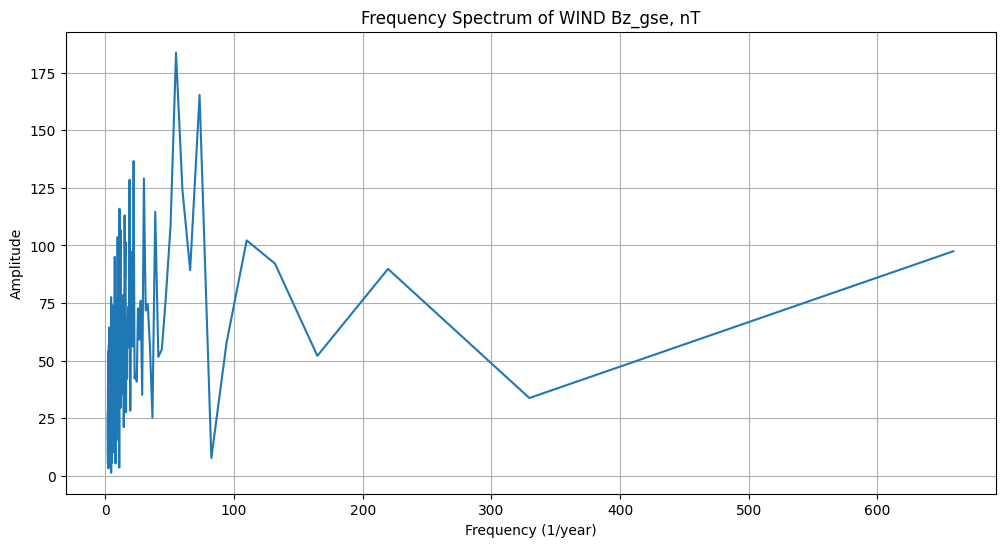

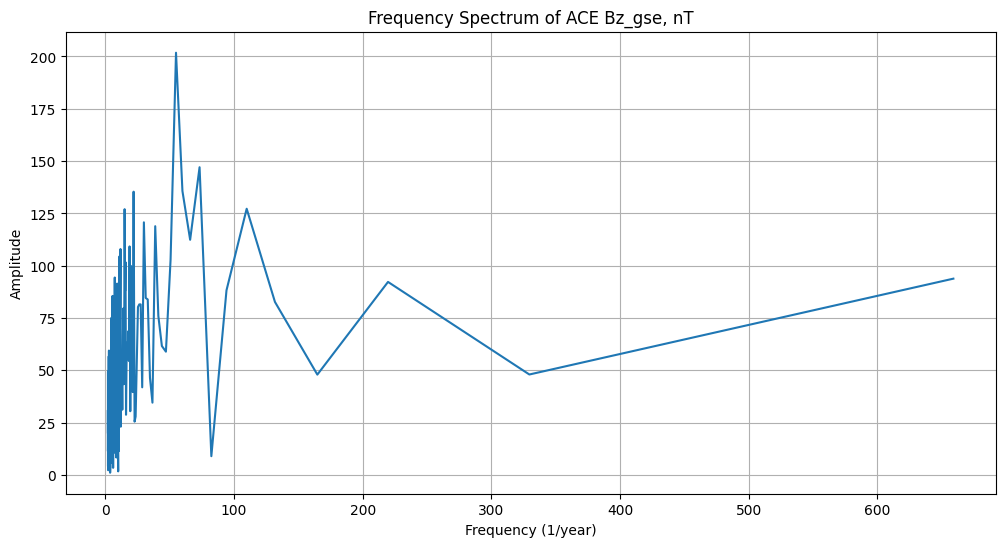

In [16]:
# Perform FFT on the time series data
for i in impcol:
    N = len(df)
    yf = fft(df[i].values)
    xf = np.fft.fftfreq(N, 1)  # Frequency bins

    # Calculate the amplitude spectrum (absolute values)
    amplitude = np.abs(yf)[:N // 2]
    xf = xf[:N // 2]

    # Plot the amplitude spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(1 / xf, amplitude)
    plt.title('Frequency Spectrum of '+i)
    plt.xlabel('Frequency (1/year)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


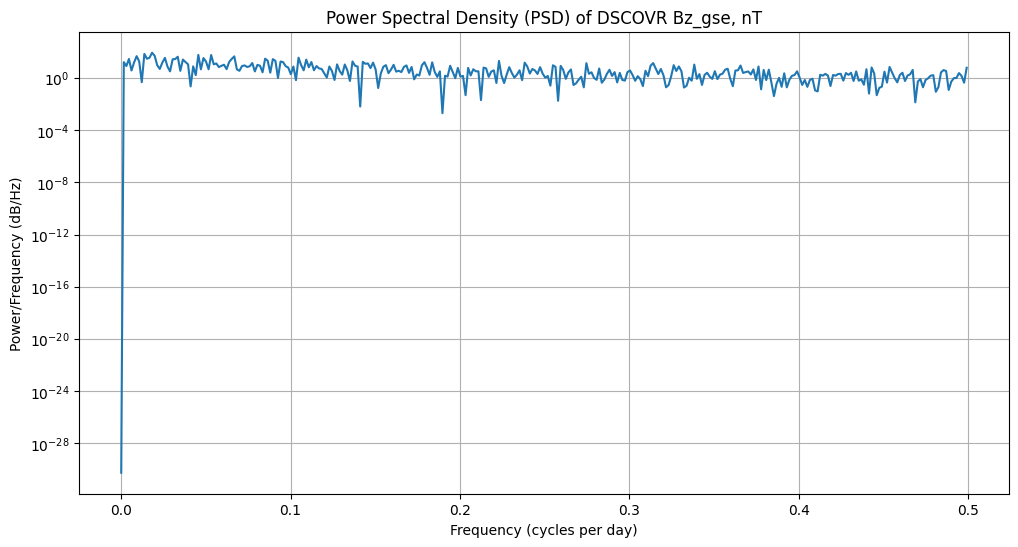

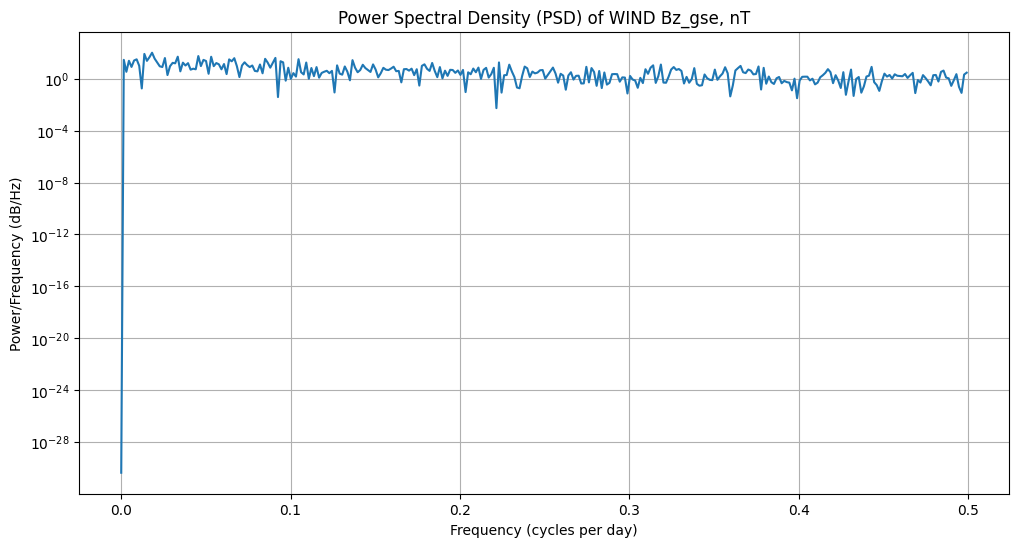

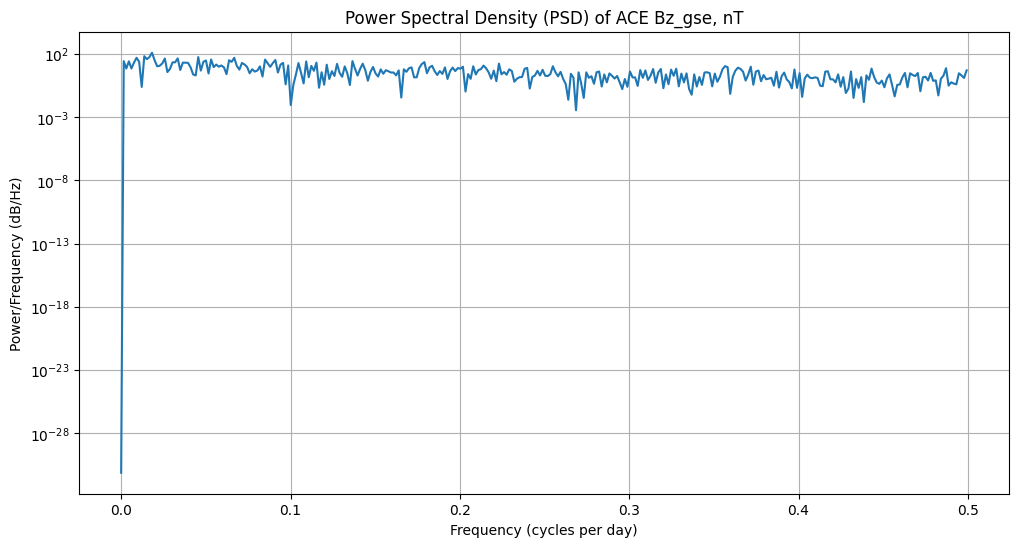

In [15]:
for i in impcol:
    frequencies, power_density = periodogram(df[i], fs=1.0)  # Assuming data is sampled daily

    # Plot the power spectral density
    plt.figure(figsize=(12, 6))
    plt.semilogy(frequencies, power_density)
    plt.title('Power Spectral Density (PSD) of '+i)
    plt.xlabel('Frequency (cycles per day)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)
    plt.show()

In [13]:
df.set_index('datetime_column',inplace=True)

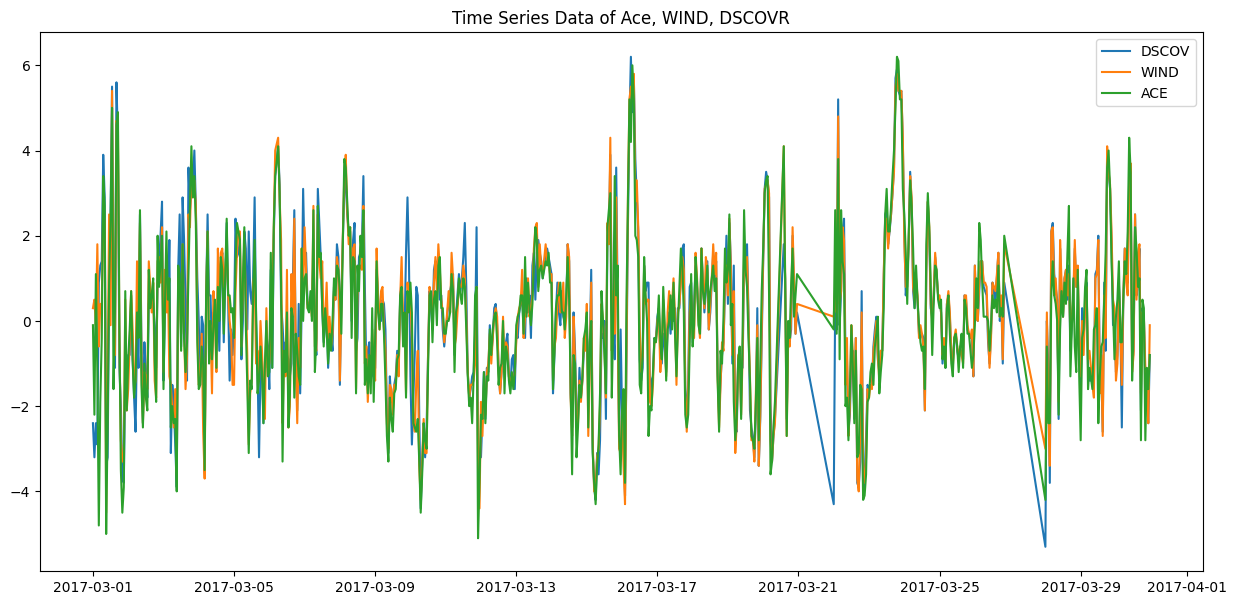

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(df["DSCOVR Bz_gse, nT"], label = "DSCOV")
plt.plot(df["WIND Bz_gse, nT"], label = "WIND")
plt.plot(df["ACE Bz_gse, nT"], label = "ACE")
plt.title("Time Series Data of Ace, WIND, DSCOVR")

plt.legend()
plt.show()